# Sentiment Analysis on Prime Minister Narendra Modi's tweets

Objectives: To analyse tweets by PM Modi, and find any interesting patterns. Begin by using Vader, a library trained on social media, to get sentiments on tweets as well as sentiment score, study the rise of tweets, make word cloud of most common words, most common positive and negative words etc.

- First identify language, and only keep english tweets.
- Then make wordcloud. 
- Carry out sentiment analysis using VADER, a social media library.
- Get sentiment score too.
- Plot word cloud for tweets with score > 0.7 (positive)
- Plot word cloud for tweets with score < -0.7 (Negative)
Plot likes vs time
Plot sentiment score vs time
Plot sentiment score vs popularity of tweet. (Sort tweets by sentiment Score)
Plot neutral tweets.
Plot most common words in Positive Tweets.
Plot most common words in Negative Tweets.



In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv(r'C:\Users\yashk\OneDrive\Documents\Notebooks\moditweets.csv')
df

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Narendra Modi,@narendramodi,2009-02-04T06:34:01.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 3, 2009",An inspiring address to Scouts & Guides in Jam...,NaN,9,11,11,[],https://twitter.com/narendramodi/status/117554...
1,Narendra Modi,@narendramodi,2009-02-01T17:55:23.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 1, 2009","2nd Feb, I will be in Dahod for Gujarat Swarni...",NaN,36,209,267,[],https://twitter.com/narendramodi/status/116729...
2,Narendra Modi,@narendramodi,2009-02-12T03:54:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 11, 2009",Most awaited gujarati version of www.narendram...,NaN,3,5,5,[],https://twitter.com/narendramodi/status/120151...
3,Narendra Modi,@narendramodi,2009-02-24T09:05:37.000Z,"Narendra Modi\n@narendramodi\n·\nFeb 24, 2009",Women would play a crucial role in the develop...,NaN,3,2,2,[],https://twitter.com/narendramodi/status/124423...
4,Narendra Modi,@narendramodi,2009-03-02T06:08:56.000Z,"Narendra Modi\n@narendramodi\n·\nMar 1, 2009",Chief Minister announces “Skill-Enhancement-Ai...,NaN,1,1,3,[],https://twitter.com/narendramodi/status/126825...
...,...,...,...,...,...,...,...,...,...,...,...
18719,Narendra Modi,@narendramodi,2022-06-15T08:21:51.000Z,Narendra Modi\n@narendramodi\n·\nJun 15,যোগৰ সৌন্দৰ্য্য ইয়াৰ সৰলতাত আছে। প্ৰয়োজন মা...,NaN,58,"1,748","4,320",['https://pbs.twimg.com/card_img/1536028640320...,https://twitter.com/narendramodi/status/153698...
18720,Narendra Modi,@narendramodi,2022-06-14T03:49:47.000Z,Narendra Modi\n@narendramodi\n·\nJun 13,"যোগা হল জ্ঞান, কর্ম আর ভক্তির সঠিক সমাহার।দ্রু...",NaN,85,"1,874","4,923",['https://pbs.twimg.com/card_img/1536028640320...,https://twitter.com/narendramodi/status/153655...
18721,Narendra Modi,@narendramodi,2022-06-13T04:22:35.000Z,Narendra Modi\n@narendramodi\n·\nJun 12,গত কয়েক বছরে যোগা সারা বিশ্বে অসম্ভব জনপ্রিয়...,NaN,85,"1,441","4,366",['https://pbs.twimg.com/card_img/1536028640320...,https://twitter.com/narendramodi/status/153620...
18722,Narendra Modi,@narendramodi,2022-06-14T03:50:27.000Z,Narendra Modi\n@narendramodi\n·\nJun 13,"যোগ জ্ঞান, কৰ্ম আৰু ভক্তিৰ এক নিখুঁত মিশ্ৰণ। ...",NaN,74,"1,837","4,720",['https://pbs.twimg.com/card_img/1536028640320...,https://twitter.com/narendramodi/status/153655...


In [3]:
# in df, only show columns Timestamp, Embedded_text, Comments, Likes, Retweets
df = df[['Timestamp', 'Embedded_text', 'Comments', 'Likes', 'Retweets']]
df

,Timestamp,Embedded_text,Comments,Likes,Retweets
0,2009-02-04T06:34:01.000Z,An inspiring address to Scouts & Guides in Jam...,9,11,11
1,2009-02-01T17:55:23.000Z,"2nd Feb, I will be in Dahod for Gujarat Swarni...",36,209,267
2,2009-02-12T03:54:37.000Z,Most awaited gujarati version of www.narendram...,3,5,5
3,2009-02-24T09:05:37.000Z,Women would play a crucial role in the develop...,3,2,2
4,2009-03-02T06:08:56.000Z,Chief Minister announces “Skill-Enhancement-Ai...,1,1,3
...,...,...,...,...,...
18719,2022-06-15T08:21:51.000Z,যোগৰ সৌন্দৰ্য্য ইয়াৰ সৰলতাত আছে। প্ৰয়োজন মা...,58,"1,748","4,320"
18720,2022-06-14T03:49:47.000Z,"যোগা হল জ্ঞান, কর্ম আর ভক্তির সঠিক সমাহার।দ্রু...",85,"1,874","4,923"
18721,2022-06-13T04:22:35.000Z,গত কয়েক বছরে যোগা সারা বিশ্বে অসম্ভব জনপ্রিয়...,85,"1,441","4,366"
18722,2022-06-14T03:50:27.000Z,"যোগ জ্ঞান, কৰ্ম আৰু ভক্তিৰ এক নিখুঁত মিশ্ৰণ। ...",74,"1,837","4,720"


In [4]:
# remove rows with NaN values
df = df.dropna()
len(df)


18456

In [5]:
#Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df

C:\Users\yashk\AppData\Local\Temp\ipykernel_23200\3118493248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


,Timestamp,Embedded_text,Comments,Likes,Retweets
0,2009-02-04 06:34:01+00:00,An inspiring address to Scouts & Guides in Jam...,9,11,11
1,2009-02-01 17:55:23+00:00,"2nd Feb, I will be in Dahod for Gujarat Swarni...",36,209,267
2,2009-02-12 03:54:37+00:00,Most awaited gujarati version of www.narendram...,3,5,5
3,2009-02-24 09:05:37+00:00,Women would play a crucial role in the develop...,3,2,2
4,2009-03-02 06:08:56+00:00,Chief Minister announces “Skill-Enhancement-Ai...,1,1,3
...,...,...,...,...,...
18719,2022-06-15 08:21:51+00:00,যোগৰ সৌন্দৰ্য্য ইয়াৰ সৰলতাত আছে। প্ৰয়োজন মা...,58,"1,748","4,320"
18720,2022-06-14 03:49:47+00:00,"যোগা হল জ্ঞান, কর্ম আর ভক্তির সঠিক সমাহার।দ্রু...",85,"1,874","4,923"
18721,2022-06-13 04:22:35+00:00,গত কয়েক বছরে যোগা সারা বিশ্বে অসম্ভব জনপ্রিয়...,85,"1,441","4,366"
18722,2022-06-14 03:50:27+00:00,"যোগ জ্ঞান, কৰ্ম আৰু ভক্তিৰ এক নিখুঁত মিশ্ৰণ। ...",74,"1,837","4,720"


In [6]:
import re
def convert_to_number(text):
    """
    Converts the input text to a number.
    """
    #remove commas
    text = text.replace(',', '')
    #remove K
    text = text.replace('K', '000')
    #remove M
    text = text.replace('M', '000000')
    #remove . from string, convert to int, and divide by 10
    text = int(text.replace('.', ''))/10
    #convert text to int
    text=int(text)/10

    return int(text)




#If likes or comments or retweets is not a number, then remove the row
df['Likes'] = df['Likes'].apply(convert_to_number)
df['Comments'] = df['Comments'].apply(convert_to_number)
df['Retweets'] = df['Retweets'].apply(convert_to_number)




C:\Users\yashk\AppData\Local\Temp\ipykernel_23200\2499029796.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Likes'] = df['Likes'].apply(convert_to_number)
C:\Users\yashk\AppData\Local\Temp\ipykernel_23200\2499029796.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Comments'] = df['Comments'].apply(convert_to_number)
C:\Users\yashk\AppData\Local\Temp\ipykernel_23200\2499029796.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [7]:
#using vader, append sentiment and sentiment score to df
df['Sentiment_score'] = df['Embedded_text'].apply(lambda x: analyser.polarity_scores(x)['compound'])
df


C:\Users\yashk\AppData\Local\Temp\ipykernel_23200\3177501072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_score'] = df['Embedded_text'].apply(lambda x: analyser.polarity_scores(x)['compound'])


,Timestamp,Embedded_text,Comments,Likes,Retweets,Sentiment_score
0,2009-02-04 06:34:01+00:00,An inspiring address to Scouts & Guides in Jam...,0,0,0,0.4215
1,2009-02-01 17:55:23+00:00,"2nd Feb, I will be in Dahod for Gujarat Swarni...",0,2,2,0.0000
2,2009-02-12 03:54:37+00:00,Most awaited gujarati version of www.narendram...,0,0,0,0.0276
3,2009-02-24 09:05:37+00:00,Women would play a crucial role in the develop...,0,0,0,0.3400
4,2009-03-02 06:08:56+00:00,Chief Minister announces “Skill-Enhancement-Ai...,0,0,0,0.0000
...,...,...,...,...,...,...
18719,2022-06-15 08:21:51+00:00,যোগৰ সৌন্দৰ্য্য ইয়াৰ সৰলতাত আছে। প্ৰয়োজন মা...,0,17,43,0.0000
18720,2022-06-14 03:49:47+00:00,"যোগা হল জ্ঞান, কর্ম আর ভক্তির সঠিক সমাহার।দ্রু...",0,18,49,0.0000
18721,2022-06-13 04:22:35+00:00,গত কয়েক বছরে যোগা সারা বিশ্বে অসম্ভব জনপ্রিয়...,0,14,43,0.0000
18722,2022-06-14 03:50:27+00:00,"যোগ জ্ঞান, কৰ্ম আৰু ভক্তিৰ এক নিখুঁত মিশ্ৰণ। ...",0,18,47,0.0000


In [8]:
#show range of sentiment scores
df['Sentiment_score'].min(), df['Sentiment_score'].max()

# We shall remove all the tweets whose sentiment score is 0, since these tweets are
# either not in English, or do not contain any meaningful text
df = df[df['Sentiment_score'] != 0]
df

,Timestamp,Embedded_text,Comments,Likes,Retweets,Sentiment_score
0,2009-02-04 06:34:01+00:00,An inspiring address to Scouts & Guides in Jam...,0,0,0,0.4215
2,2009-02-12 03:54:37+00:00,Most awaited gujarati version of www.narendram...,0,0,0,0.0276
3,2009-02-24 09:05:37+00:00,Women would play a crucial role in the develop...,0,0,0,0.3400
5,2009-03-02 06:08:55+00:00,Narendrabhai Modi: Through water conservation ...,0,0,0,0.3182
7,2009-03-16 07:04:29+00:00,"Reading: ""Gujarat posts 12.8% agriculture grow...",0,0,0,0.3818
...,...,...,...,...,...,...
18690,2022-06-13 04:56:51+00:00,Transformative initiatives for all-round devel...,3,31,75,0.1759
18691,2022-06-13 04:54:03+00:00,The last 8 years have seen unprecedented devel...,3,27,75,0.9393
18692,2022-06-13 13:08:41+00:00,"In the evening, I will take part in the Dwisha...",1,24,79,0.6908
18693,2022-06-13 02:51:40+00:00,"In the last few years, Yoga has gained tremend...",3,27,1050,0.7178


In [9]:
#append sentiment category to df
# if sentiment score is greater than 0.3, sentiment is positive
# if sentiment score is less than -0.3, sentiment is negative
# if sentiment score is between -0.3 and 0.3, sentiment is neutral
df['Sentiment'] = df['Sentiment_score'].apply(lambda x: 'Positive' if x > 0.3 else ('Negative' if x < -0.3 else 'Neutral'))

#print sentiment counts
df['Sentiment'].value_counts()

C:\Users\yashk\AppData\Local\Temp\ipykernel_23200\3756582435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment_score'].apply(lambda x: 'Positive' if x > 0.3 else ('Negative' if x < -0.3 else 'Neutral'))


Positive    10404
Neutral      1519
Negative     1042
Name: Sentiment, dtype: int64

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yashk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\yashk\AppData\Local\Temp\ipykernel_23200\609866538.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_text'] = df['Embedded_text'].apply(clean_text)


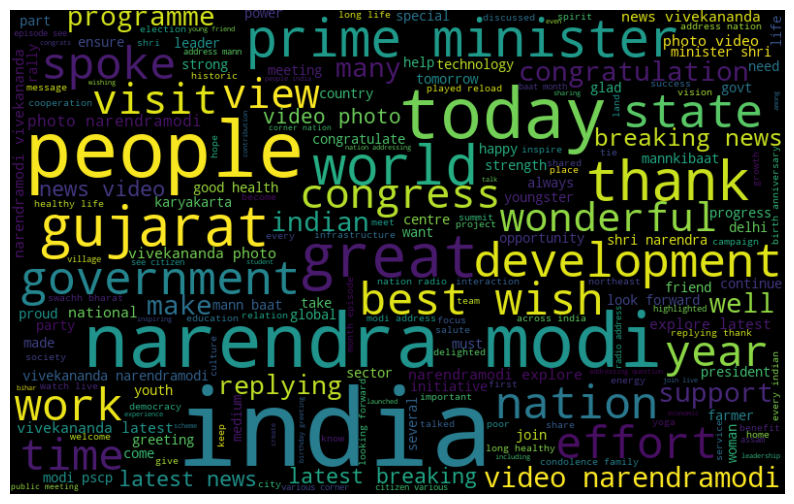

In [10]:
#Make a word cloud of the most common words in the tweets
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


#remove repeated words, stopwords, and words with less than 3 characters, numbers, and links. Also lemmatize.
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)    #remove @mentions
    text = re.sub(r'#', '', text)    #remove hashtags
    text = re.sub(r'RT[\s]+', '', text)    #remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)    #remove hyperlinks
    text = re.sub(r'[^a-zA-Z]', ' ', text)    #remove numbers and punctuation
    text = re.sub(r'\s+', ' ', text)    #remove extra spaces
    text = text.lower()    #convert to lowercase
    text = text.split()    #split into list of words
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english') and len(word) > 3]    #remove stopwords and lemmatize
    text = ' '.join(text)    #join list of words into string
    return text

df['Clean_text'] = df['Embedded_text'].apply(clean_text)
#join all the tweets into one string
all_words = ' '.join([text for text in df['Clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords = STOPWORDS).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")    #interpolation="bilinear" makes the image look smoother
plt.axis('off')
plt.show()



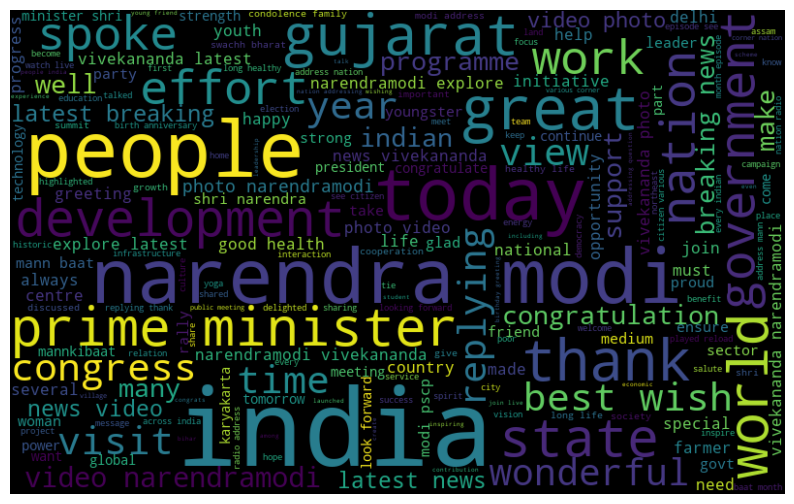

In [11]:
#Make a wordcloud of words that are most common in the most retweeted tweets

#join all the tweets into one string
all_words = ' '.join([text for text in df['Clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords = STOPWORDS).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

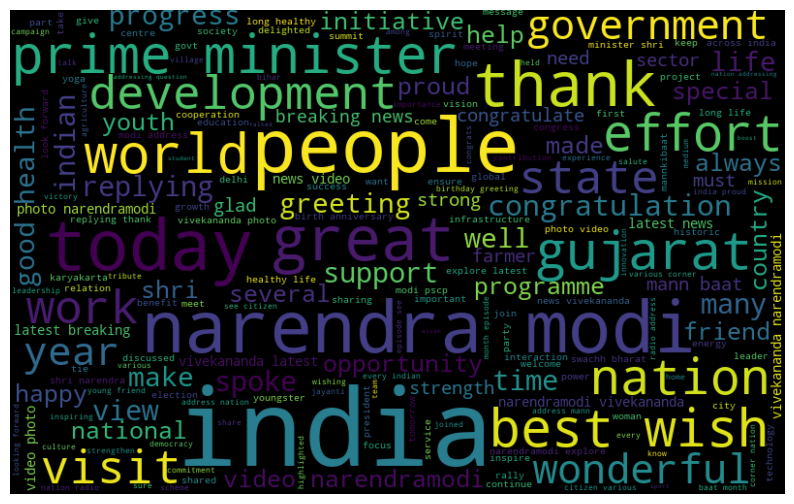

In [12]:
# Make a word cloud from the clean text, where the sentiment is positive
all_words = ' '.join([text for text in df['Clean_text'][df['Sentiment'] == 'Positive']])
word_scores = []
for word in all_words.split():
    word_scores.append(word)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords = STOPWORDS).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()



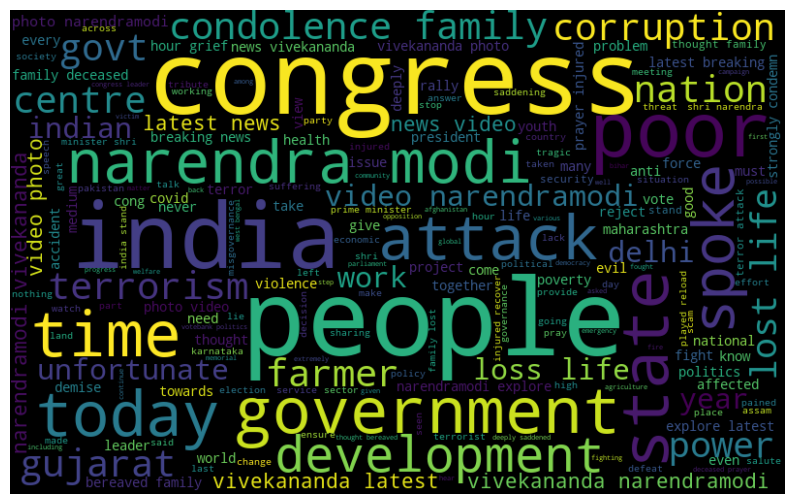

In [13]:
# Make a word cloud from the clean text, where the sentiment is negative
all_words = ' '.join([text for text in df['Clean_text'][df['Sentiment'] == 'Negative']])
word_scores = []
for word in all_words.split():
    word_scores.append(word)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords = STOPWORDS).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
# Sort df in order of timestamp
df = df.sort_values(by='Timestamp')
df

,Timestamp,Embedded_text,Comments,Likes,Retweets,Sentiment_score,Sentiment,Clean_text
0,2009-02-04 06:34:01+00:00,An inspiring address to Scouts & Guides in Jam...,0,0,0,0.4215,Positive,inspiring address scout guide jamboree watch l...
2,2009-02-12 03:54:37+00:00,Most awaited gujarati version of www.narendram...,0,0,0,0.0276,Neutral,awaited gujarati version narendramodi launched...
3,2009-02-24 09:05:37+00:00,Women would play a crucial role in the develop...,0,0,0,0.3400,Positive,woman would play crucial role development guja...
5,2009-03-02 06:08:55+00:00,Narendrabhai Modi: Through water conservation ...,0,0,0,0.3182,Positive,narendrabhai modi water conservation movement ...
7,2009-03-16 07:04:29+00:00,"Reading: ""Gujarat posts 12.8% agriculture grow...",0,0,0,0.3818,Positive,reading gujarat post agriculture growth highes...
...,...,...,...,...,...,...,...,...
18686,2022-06-14 05:22:18+00:00,Ours is a Government fully dedicated to servin...,4,32,81,0.2398,Neutral,government fully dedicated serving poor margin...
18685,2022-06-14 09:13:45+00:00,Blessed to inaugurate Jagatguru Shrisant Tukar...,7,52,1660,0.9451,Positive,blessed inaugurate jagatguru shrisant tukaram ...
18684,2022-06-14 17:36:38+00:00,The Gallery of Revolutionaries at the Raj Bhaw...,7,49,2110,0.7906,Positive,gallery revolutionary bhawan mumbai great effo...
18682,2022-06-15 08:49:51+00:00,Yesterday’s Maharashtra visit was wonderful. I...,13,57,240,0.7579,Positive,yesterday maharashtra visit wonderful take par...


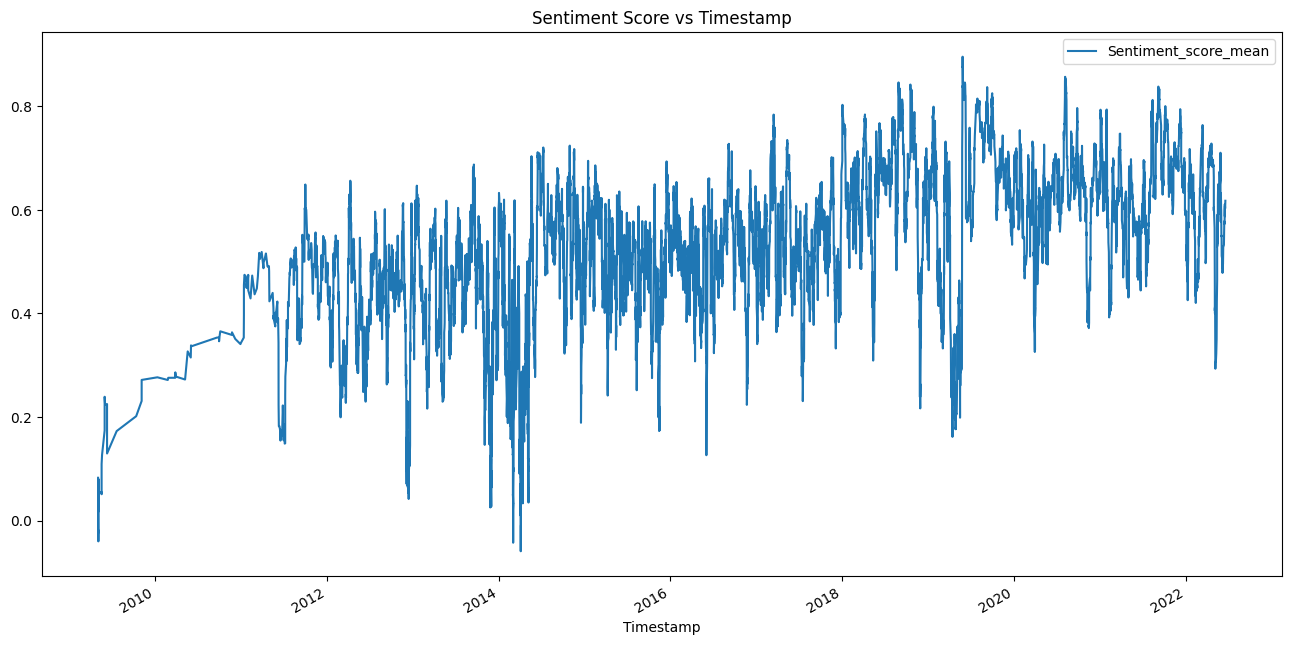

In [15]:
#plot sentiment score with timestamp
#take rolling average of 30 tweets
df['Sentiment_score_mean'] = df['Sentiment_score'].rolling(30).mean()

df.plot(x='Timestamp', y=['Sentiment_score_mean'], figsize=(16, 8), title='Sentiment Score vs Timestamp')
plt.show()

,Timestamp,Embedded_text,Comments,Likes,Retweets,Sentiment_score,Sentiment,Clean_text,Sentiment_score_mean,Date
0,2009-02-04 06:34:01+00:00,An inspiring address to Scouts & Guides in Jam...,0,0,0,0.4215,Positive,inspiring address scout guide jamboree watch l...,NaN,2009-02-04
2,2009-02-12 03:54:37+00:00,Most awaited gujarati version of www.narendram...,0,0,0,0.0276,Neutral,awaited gujarati version narendramodi launched...,NaN,2009-02-12
3,2009-02-24 09:05:37+00:00,Women would play a crucial role in the develop...,0,0,0,0.3400,Positive,woman would play crucial role development guja...,NaN,2009-02-24
5,2009-03-02 06:08:55+00:00,Narendrabhai Modi: Through water conservation ...,0,0,0,0.3182,Positive,narendrabhai modi water conservation movement ...,NaN,2009-03-02
7,2009-03-16 07:04:29+00:00,"Reading: ""Gujarat posts 12.8% agriculture grow...",0,0,0,0.3818,Positive,reading gujarat post agriculture growth highes...,NaN,2009-03-16
...,...,...,...,...,...,...,...,...,...,...
18686,2022-06-14 05:22:18+00:00,Ours is a Government fully dedicated to servin...,4,32,81,0.2398,Neutral,government fully dedicated serving poor margin...,0.587253,2022-06-14
18685,2022-06-14 09:13:45+00:00,Blessed to inaugurate Jagatguru Shrisant Tukar...,7,52,1660,0.9451,Positive,blessed inaugurate jagatguru shrisant tukaram ...,0.594083,2022-06-14
18684,2022-06-14 17:36:38+00:00,The Gallery of Revolutionaries at the Raj Bhaw...,7,49,2110,0.7906,Positive,gallery revolutionary bhawan mumbai great effo...,0.607040,2022-06-14
18682,2022-06-15 08:49:51+00:00,Yesterday’s Maharashtra visit was wonderful. I...,13,57,240,0.7579,Positive,yesterday maharashtra visit wonderful take par...,0.602447,2022-06-15


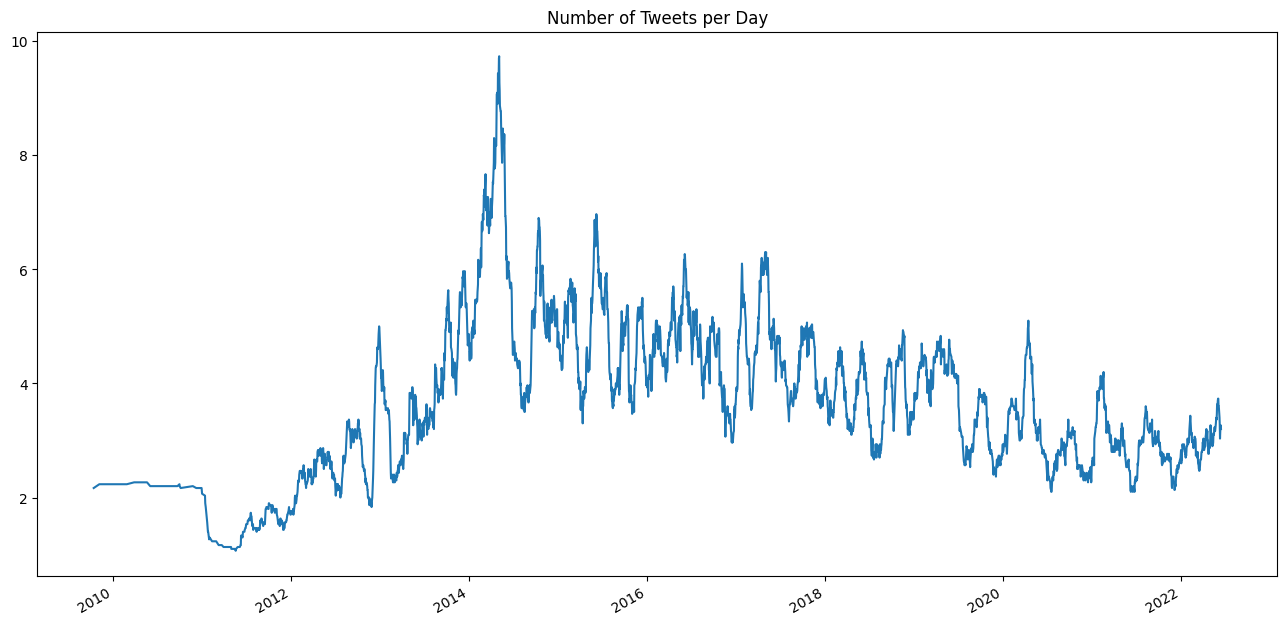

In [16]:
# Plot the rolling average of number of tweets per day one year from April 11, 2018 to April 11, 2019
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date
df['Date'] = pd.to_datetime(df['Date'])

df['Date'].value_counts().sort_index().rolling(30).mean().plot(figsize=(16, 8), title='Number of Tweets per Day')
df

1168


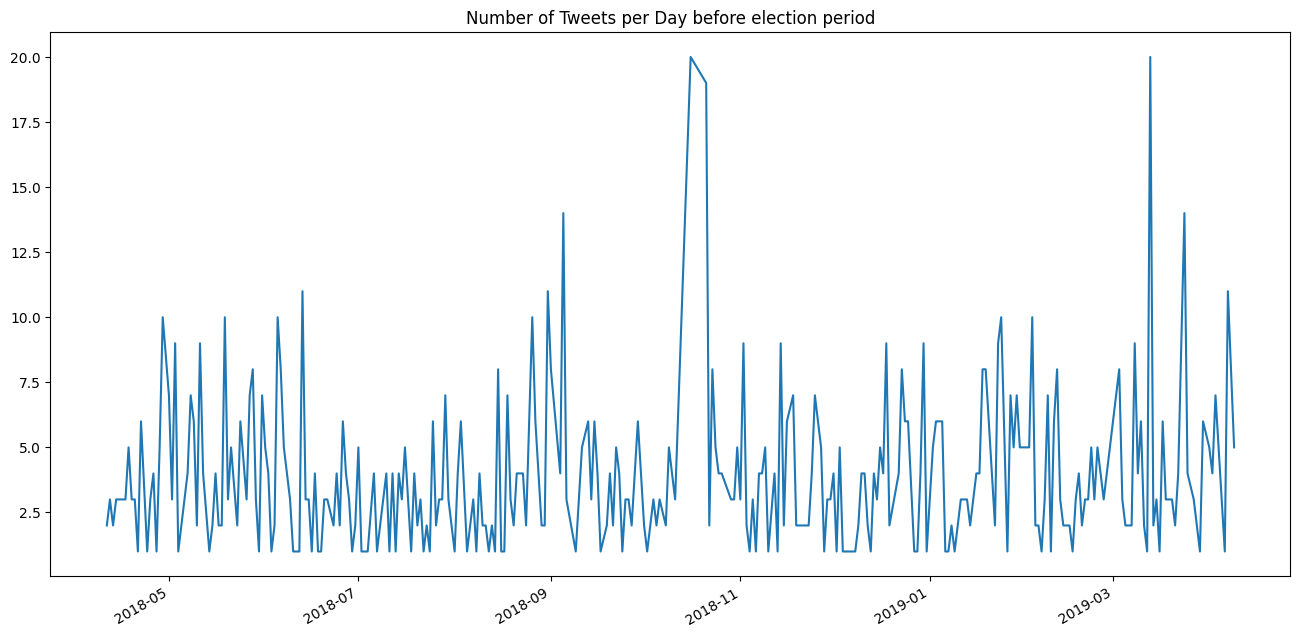

In [17]:
date_range = pd.date_range(start='2018-4-11', end='2019-4-11') 
# Filter the DataFrame to include only dates within the specified range
df_filtered = df[df['Date'].isin(date_range)]
print(df_filtered['Date'].count())
# Plot the number of tweets per day for the filtered DataFrame
df_filtered['Date'].value_counts().plot(figsize=(16, 8), title='Number of Tweets per Day before election period')
plt.show()

In [18]:
# Plot the number of likes one year from April 11, 2018 to April 11, 2019



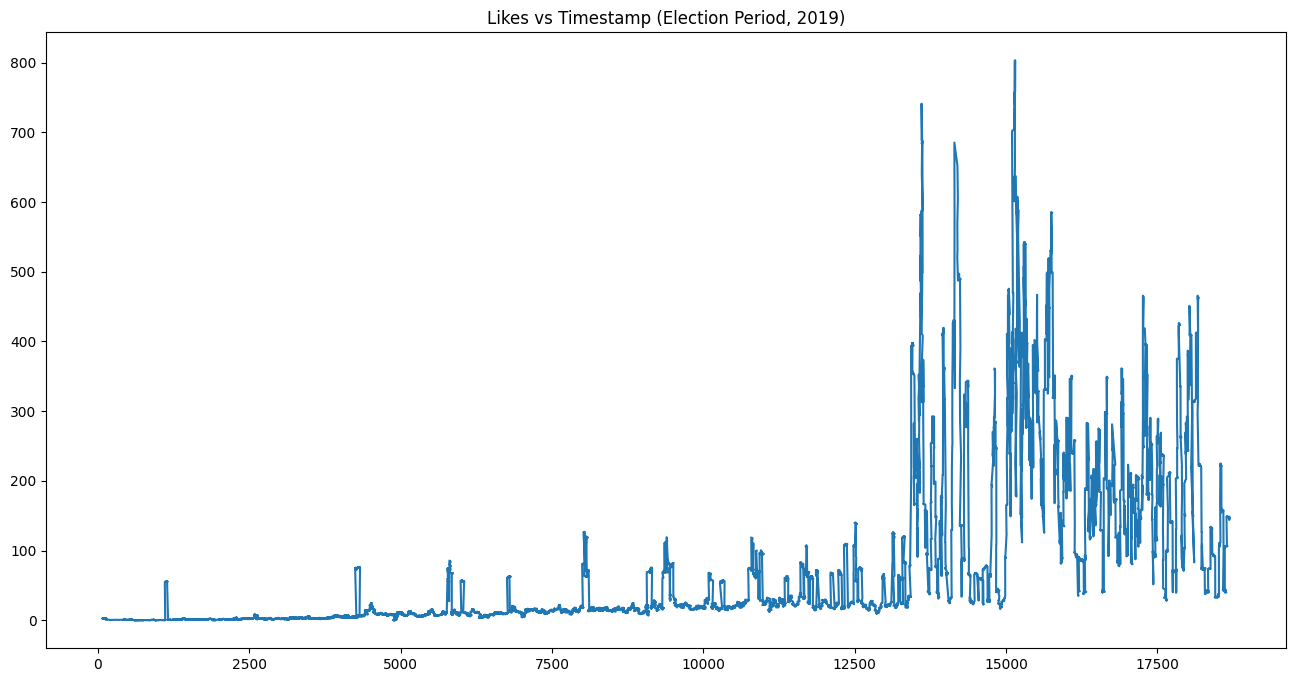

In [19]:
# Plot the rolling average of number of likes one year from April 11, 2018 to April 11, 2019

df["likes_roll"]=df["Likes"].rolling(30).mean()
df['likes_roll'].plot(figsize=(16, 8), title='Likes vs Timestamp (Election Period, 2019)')
plt.show()


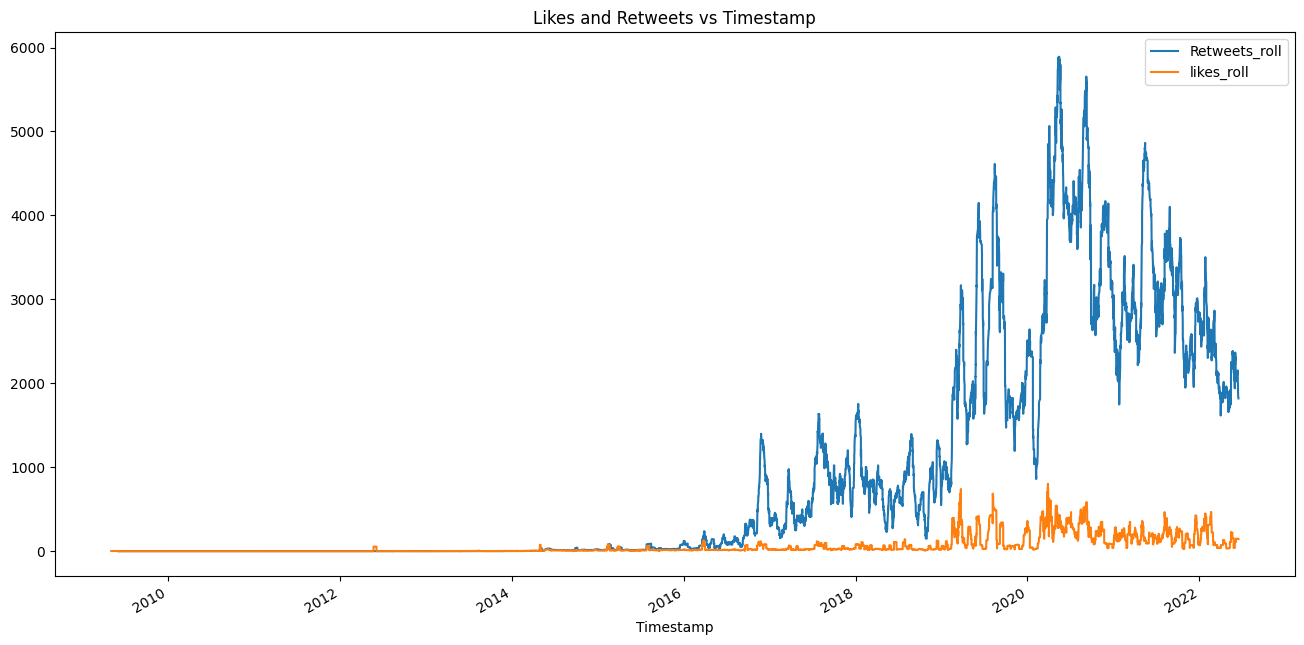

In [20]:
#Plot the rolling average of 30 days of Retweets with timestamp
df['Retweets_roll'] = df['Retweets'].rolling(60).mean()
df.plot(x='Timestamp', y=['Retweets_roll', 'likes_roll'], figsize=(16, 8), title='Likes and Retweets vs Timestamp')
plt.show()

Text(0, 0.5, 'Number of Likes')

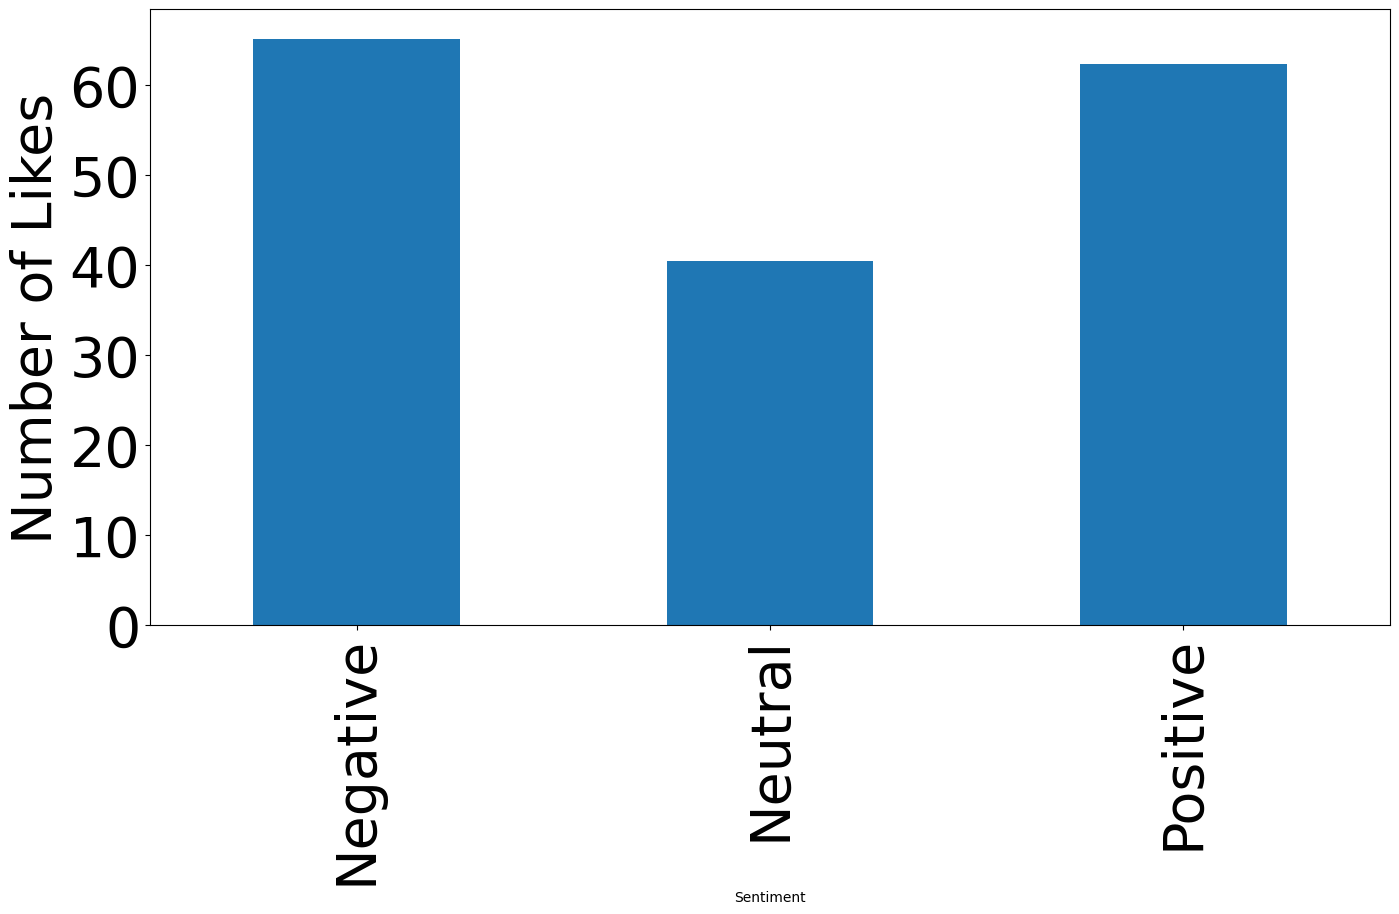

In [51]:
#Plot average likes per tweet, for each sentiment category
df.groupby('Sentiment').mean()['Likes'].plot(kind='bar', figsize=(16, 8), fontsize=40)
#number of likes add on y axis
plt.ylabel('Number of Likes', fontsize=40)


Text(0, 0.5, 'Number of Retweets')

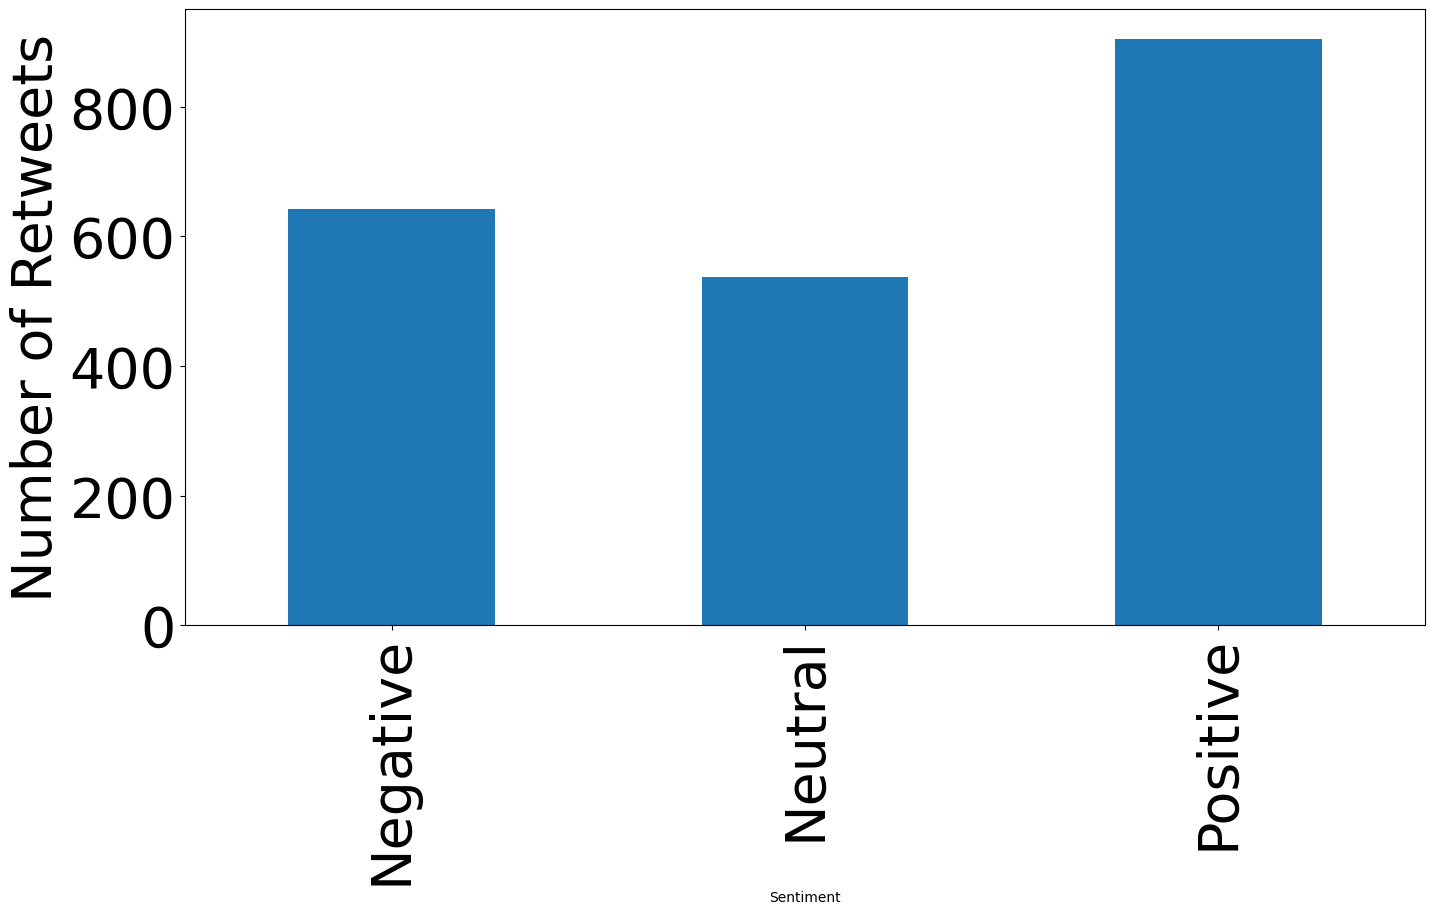

In [52]:
#Plot average likes per tweet, for each sentiment category. Text size 4 times larger
df.groupby('Sentiment').mean()['Retweets'].plot(kind='bar', figsize=(16, 8), fontsize=40)
plt.ylabel('Number of Retweets', fontsize=40)

Text(0, 0.5, 'Number of Comments')

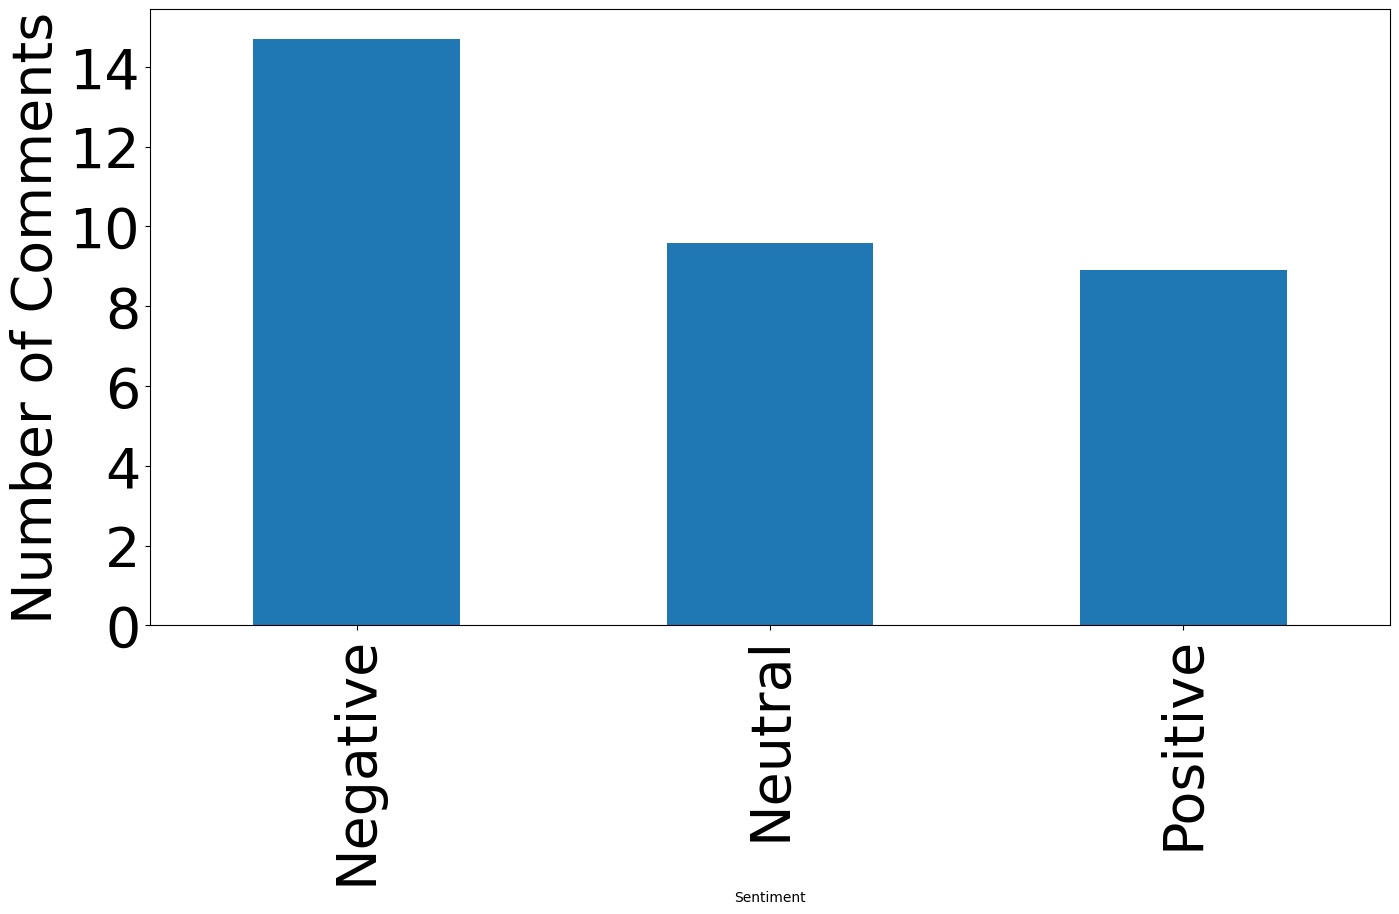

In [53]:
#Plot average likes per tweet, for each sentiment category
df.groupby('Sentiment').mean()['Comments'].plot(kind='bar', figsize=(16, 8), fontsize=40)
plt.ylabel('Number of Comments', fontsize=40)

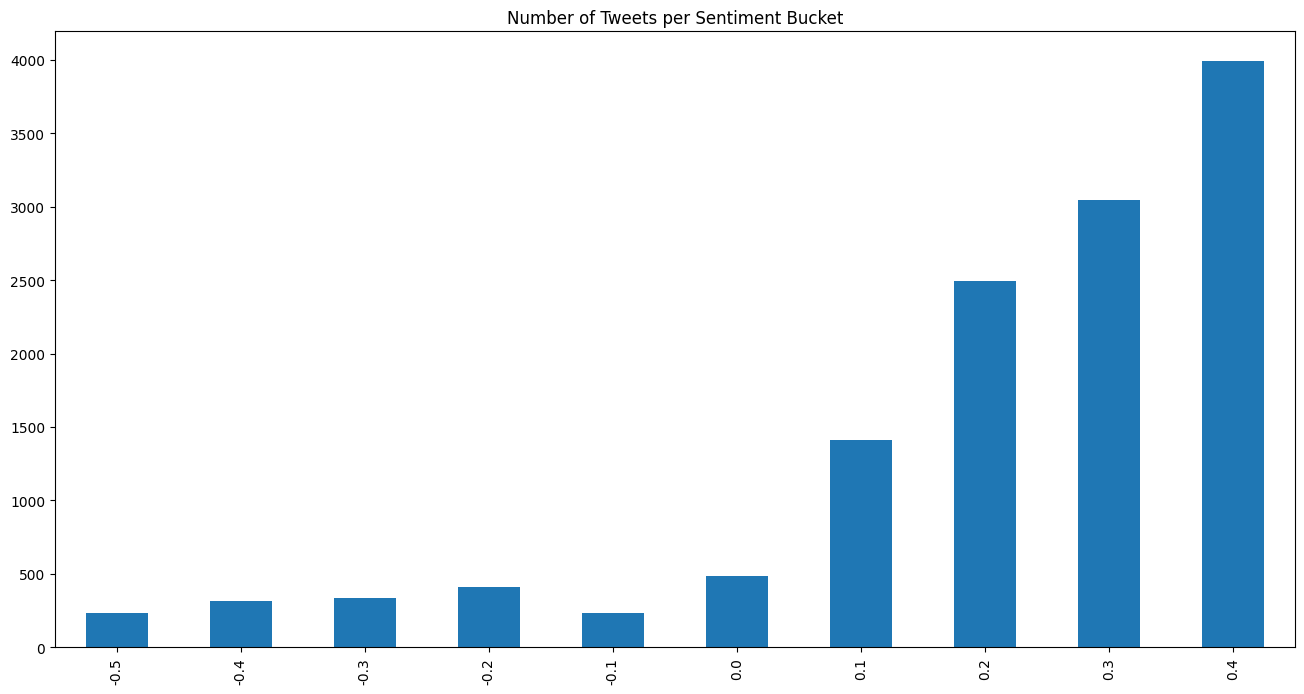

In [54]:
#Analysing Tweets per Sentiment Bucket (Buckets of 0.1 sentiment score)

df['Sentiment_bucket'] = pd.cut(df['Sentiment_score'], bins=10, labels=False)
df['Sentiment_bucket'] = (df['Sentiment_bucket'] - 5)/10
df['Sentiment_bucket'].value_counts().sort_index().plot(kind='bar', figsize=(16, 8), title='Number of Tweets per Sentiment')
plt.show()


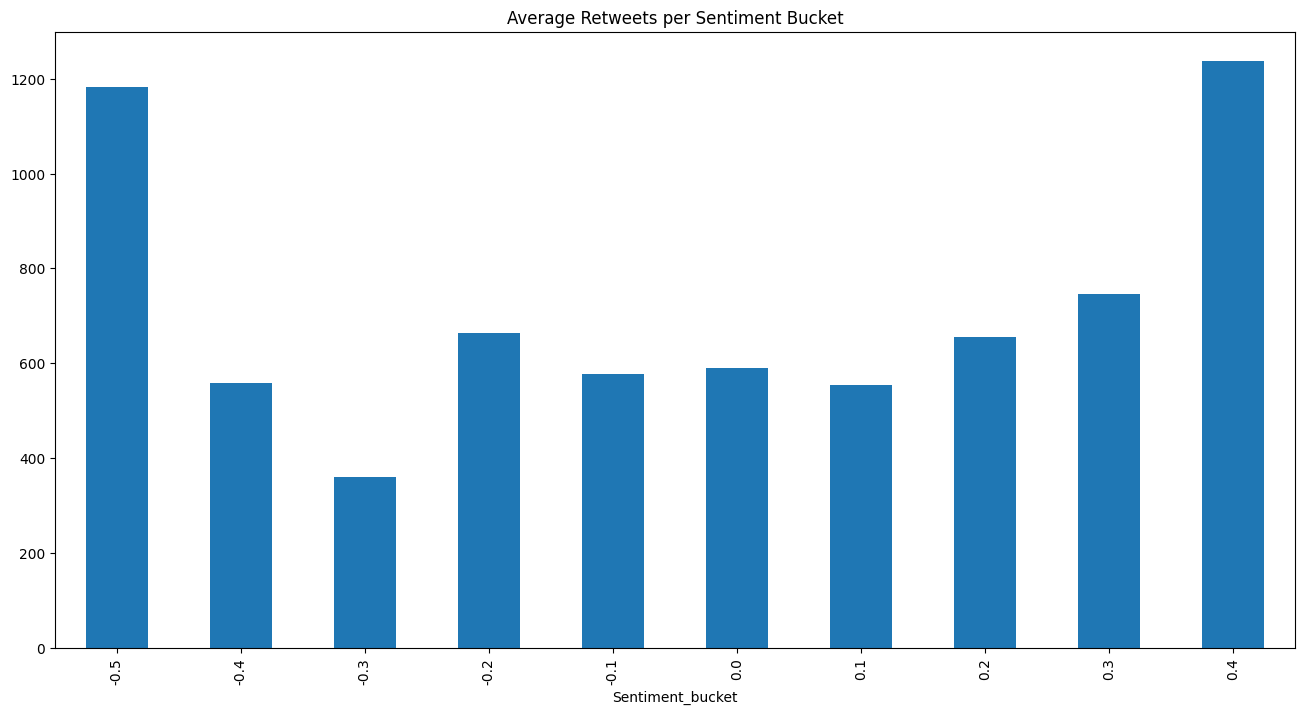

In [55]:
#plot average retweets per sentiment bucket, for each sentiment bucket value
df.groupby('Sentiment_bucket').mean()['Retweets'].plot(kind='bar', figsize=(16, 8), title='Average Retweets per Sentiment')
plt.show()

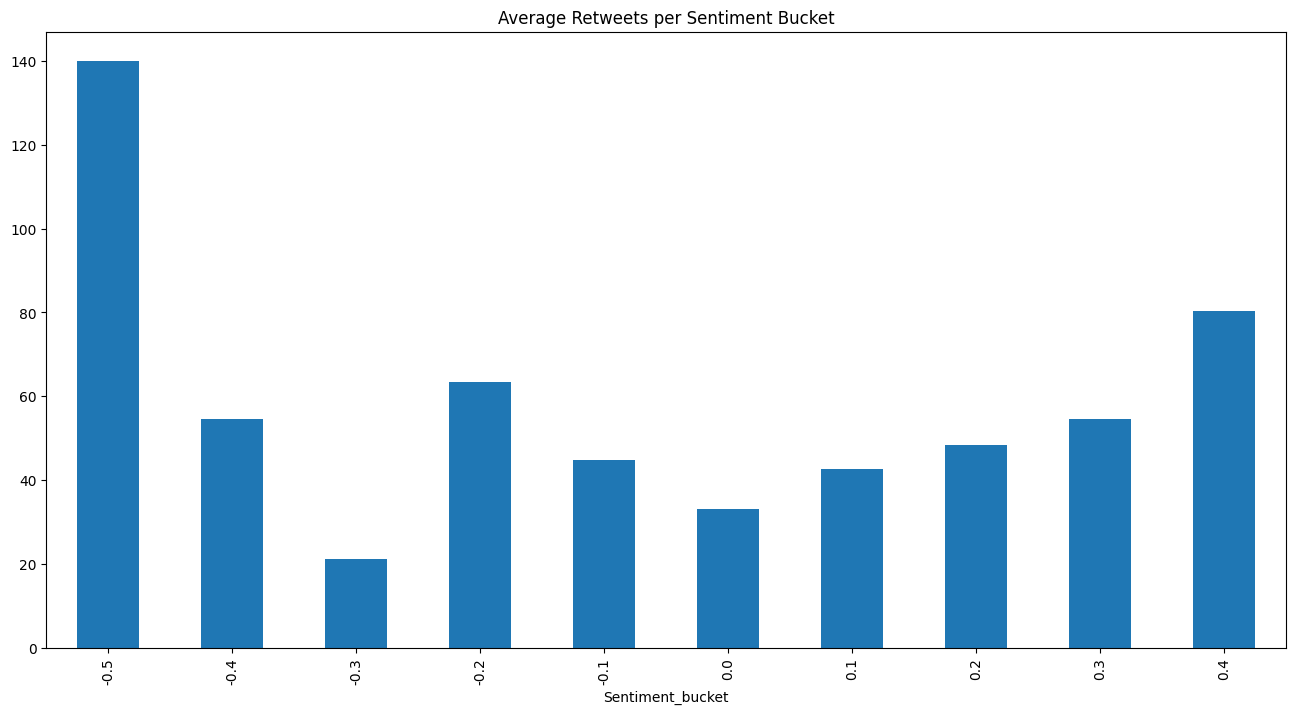

In [56]:
#plot average retweets per sentiment bucket, for each sentiment bucket value
df.groupby('Sentiment_bucket').mean()['Likes'].plot(kind='bar', figsize=(16, 8), title='Average Retweets per Sentiment')
plt.show()